# Линейная регрессия


Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Создание объекта MinMaxScaler
scaler = MinMaxScaler()

# Ввод датасета
data = pd.read_csv('CellPhone.csv')

# Выделите только числовые столбцы
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

normalized_data = scaler.fit_transform(data[numeric_columns])
dataset = pd.DataFrame(normalized_data, columns=numeric_columns)


In [2]:
print(dataset.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [3]:
import pandas as pd
import numpy as np

import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = dataset.drop(columns=['price_range'])

y = dataset['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

regression = model.fit(X_train, y_train)
# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.011545411085130625
R² Score: 0.9181733564712246


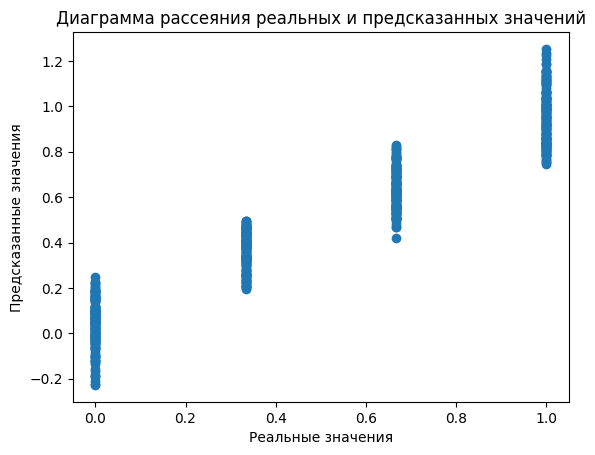

In [4]:
import matplotlib.pyplot as plt

# Предположим, что y_test - это реальные значения, а y_pred - предсказанные значения
plt.scatter(y_test, y_pred)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Диаграмма рассеяния реальных и предсказанных значений')
plt.show()

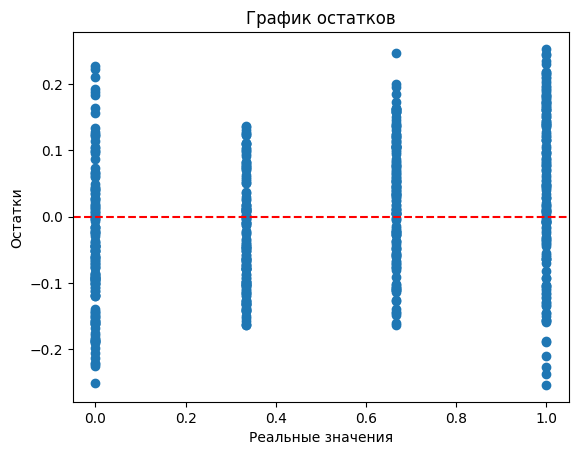

In [5]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('Реальные значения')
plt.ylabel('Остатки')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График остатков')
plt.show()

In [6]:
# Получение коэффициентов модели
coefficients = model.coef_

# Создание DataFrame для удобного отображения результатов
importance_df = pd.DataFrame({'Признак': X.columns, 'Коэффициент': coefficients})
importance_df = importance_df.sort_values(by='Коэффициент', ascending=False)

# Вывод результатов
print(importance_df)

          Признак  Коэффициент
13            ram     1.177079
0   battery_power     0.253710
11      px_height     0.173862
12       px_width     0.134765
6      int_memory     0.018405
17        three_g     0.011585
9         n_cores     0.007072
16      talk_time     0.006338
15           sc_w     0.005457
4              fc     0.003691
14           sc_h     0.001819
10             pc     0.001103
18   touch_screen     0.000323
19           wifi    -0.002468
1            blue    -0.003377
5          four_g    -0.003675
3        dual_sim    -0.009063
7           m_dep    -0.010816
2     clock_speed    -0.011077
8       mobile_wt    -0.039999
